In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df_ext = pd.read_csv('../data/raw/dating_app_behavior_dataset_extended1.csv')

In [4]:
df = df_ext.copy()

In [5]:
df['match_outcome'].unique()

array(['Mutual Match', 'Chat Ignored', 'Date Happened', 'No Action',
       'One-sided Like', 'Blocked', 'Relationship Formed', 'Catfished',
       'Ghosted', 'Instant Match'], dtype=object)

Positive: -> 1
- Mutual Match
- Date Happened
- Relationship Formed
- Instant Match

Negative:-> 0
- No Action
- One-sided Like
- Chat Ignored
- Ghosted
- Blocked
- Catfished

In [6]:
# change target to numerical
df['target_binary'] = df['match_outcome'].isin([
    'Mutual Match',
    'Date Happened',
    'Relationship Formed',
    'Instant Match'
]).astype(int)

**Target**
match_outcome   → categorical target
target_binary   → binary target（0/1）

**Features**

1.Numerical -> StandardScaler

app_usage_time_min
swipe_right_ratio
likes_received
mutual_matches
profile_pics_count
bio_length
message_sent_count
emoji_usage_rate
last_active_hour
age
height_cm
weight_kg

2.Ordinal -> Ordinal Encoding

income_bracket
education_level
app_usage_time_label
swipe_right_label

3. Nominal -> One-Hot Encoding

gender
sexual_orientation
location_type
swipe_time_of_day
zodiac_sign
body_type
relationship_intent
interest_tags


In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [8]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

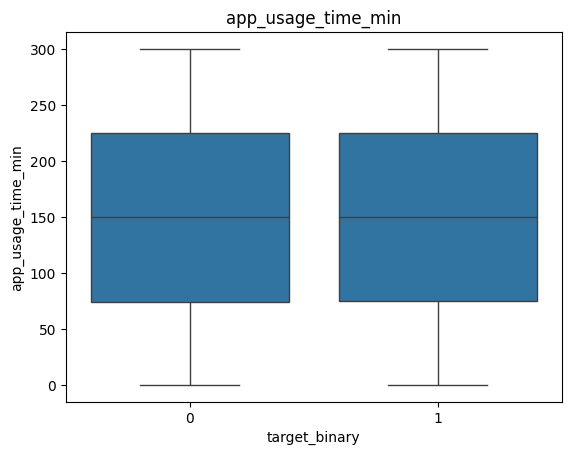

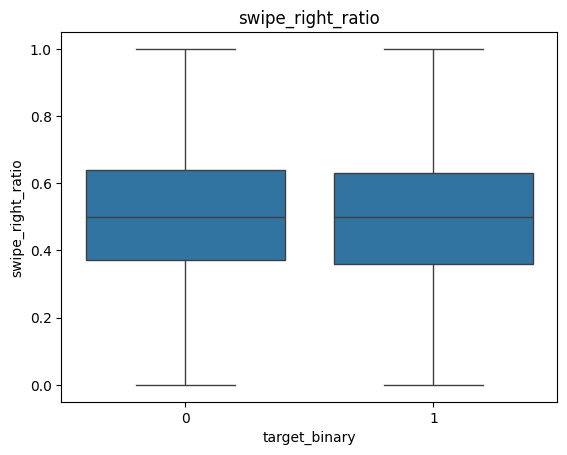

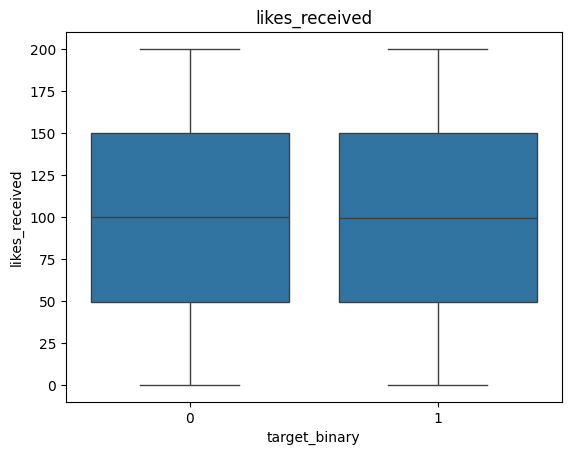

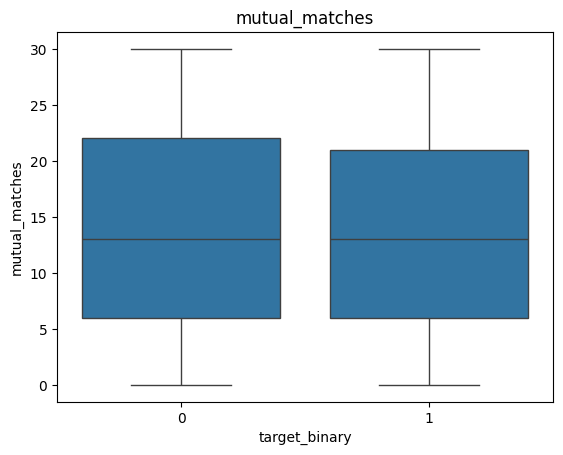

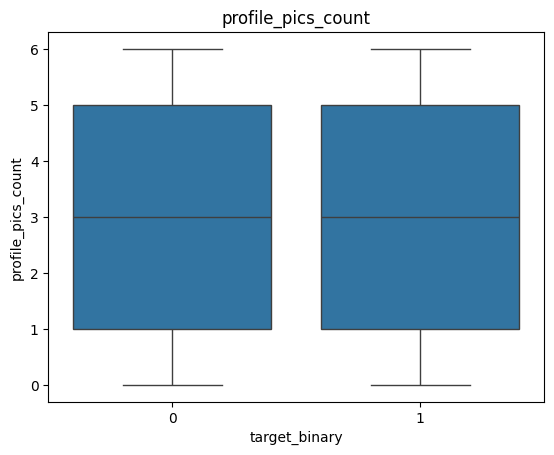

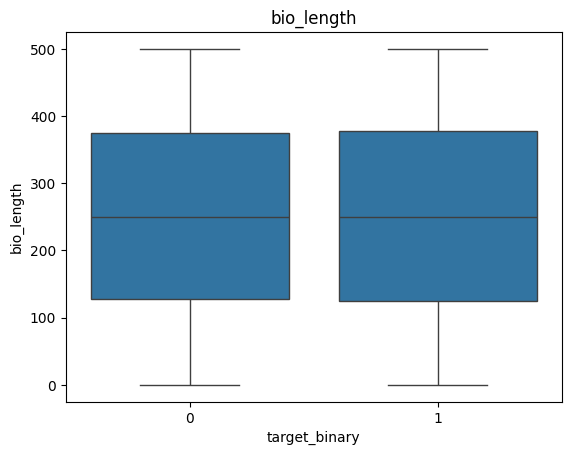

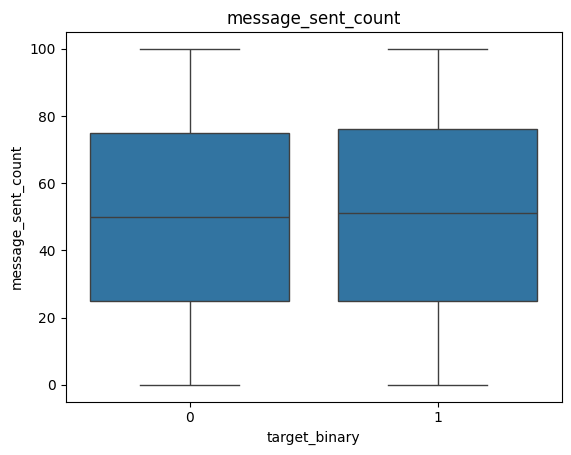

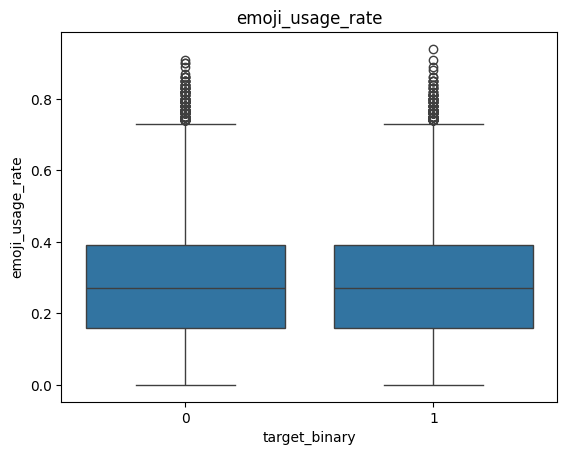

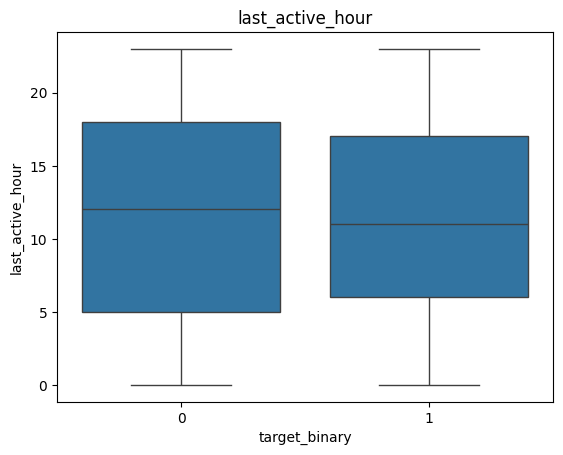

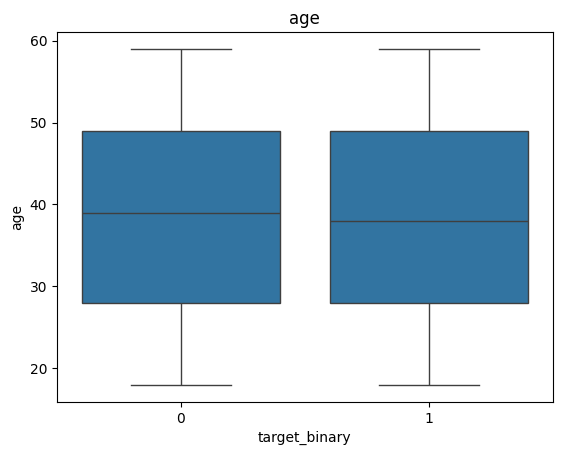

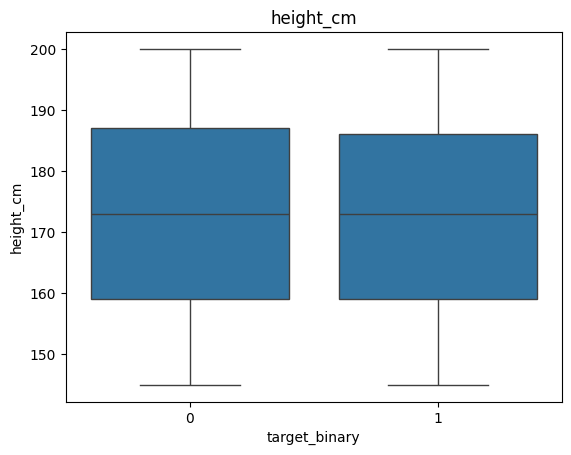

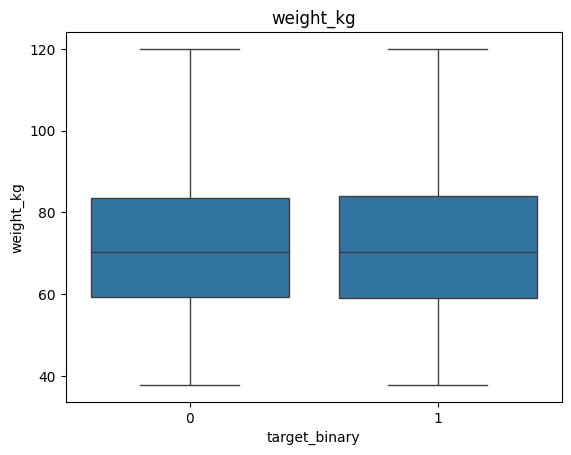

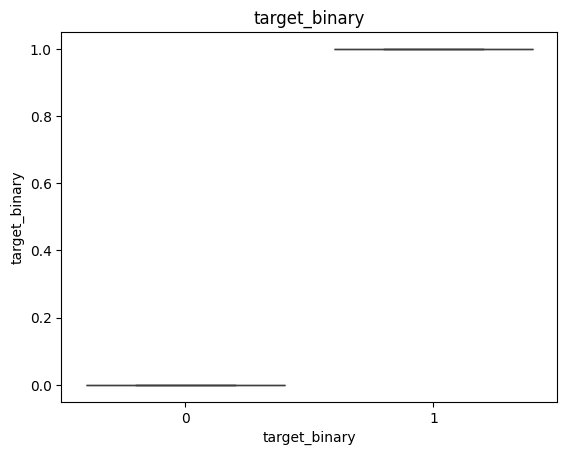

In [9]:
for col in numerical_cols:
    sns.boxplot(x=df['target_binary'], y=df[col])
    plt.title(col)
    plt.show()

In [10]:
from scipy.stats import chi2_contingency

for col in categorical_cols:
    contingency = pd.crosstab(df[col], df['target_binary'])
    chi2, p, dof, expected = chi2_contingency(contingency)

    print(f"{col:25s} p-value = {p:.4e}")

gender                    p-value = 6.4590e-01
sexual_orientation        p-value = 4.8733e-01
location_type             p-value = 6.3417e-01
income_bracket            p-value = 7.2094e-01
education_level           p-value = 1.4193e-01
interest_tags             p-value = 3.5538e-01
app_usage_time_label      p-value = 9.2974e-01
swipe_right_label         p-value = 2.5878e-01
swipe_time_of_day         p-value = 6.5360e-02
match_outcome             p-value = 0.0000e+00
zodiac_sign               p-value = 3.3349e-01
body_type                 p-value = 8.1485e-01
relationship_intent       p-value = 3.5005e-01


In [12]:
for col in categorical_cols:
    print(f"\n{col}")
    display(
        pd.crosstab(df[col], df['target_binary'], normalize='index')
    )


gender


target_binary,0,1
gender,,
Female,0.604127,0.395873
Genderfluid,0.604550,0.395450
Male,0.596002,0.403998
Non-binary,0.609371,0.390629
Prefer Not to Say,0.601200,0.398800
Transgender,0.602658,0.397342



sexual_orientation


target_binary,0,1
sexual_orientation,,
Asexual,0.603614,0.396386
Bisexual,0.593537,0.406463
Demisexual,0.606412,0.393588
Gay,0.597778,0.402222
Lesbian,0.600633,0.399367
Pansexual,0.601732,0.398268
Queer,0.607188,0.392812
Straight,0.612709,0.387291



location_type


target_binary,0,1
location_type,,
Metro,0.603039,0.396961
Remote Area,0.607583,0.392417
Rural,0.606410,0.393590
Small Town,0.599305,0.400695
Suburban,0.596191,0.403809
Urban,0.605378,0.394622



income_bracket


target_binary,0,1
income_bracket,,
High,0.601724,0.398276
Low,0.595345,0.404655
Lower-Middle,0.603681,0.396319
Middle,0.610441,0.389559
Upper-Middle,0.604438,0.395562
Very High,0.601142,0.398858
Very Low,0.604305,0.395695



education_level


target_binary,0,1
education_level,,
Associate’s,0.614839,0.385161
Bachelor’s,0.601665,0.398335
Diploma,0.599229,0.400771
High School,0.605114,0.394886
MBA,0.616108,0.383892
Master’s,0.603126,0.396874
No Formal Education,0.594182,0.405818
PhD,0.592778,0.407222
Postdoc,0.599854,0.400146



interest_tags


target_binary,0,1
interest_tags,,
"Anime, Art, Binge-Watching",0.333333,0.666667
"Anime, Art, Cars",0.500000,0.500000
"Anime, Art, Coding",0.000000,1.000000
"Anime, Art, DIY",0.000000,1.000000
"Anime, Art, Gaming",1.000000,0.000000
...,...,...
"Yoga, Writing, Music",1.000000,0.000000
"Yoga, Writing, Photography",1.000000,0.000000
"Yoga, Writing, Reading",0.000000,1.000000



app_usage_time_label


target_binary,0,1
app_usage_time_label,,
Addicted,0.602483,0.397517
Barely,0.593431,0.406569
Extreme User,0.602135,0.397865
High,0.601857,0.398143
Low,0.603550,0.396450
Moderate,0.607121,0.392879
Very Low,0.615527,0.384473



swipe_right_label


target_binary,0,1
swipe_right_label,,
Balanced,0.597101,0.402899
Choosy,0.595002,0.404998
Optimistic,0.606631,0.393369
Swipe Maniac,0.602586,0.397414



swipe_time_of_day


target_binary,0,1
swipe_time_of_day,,
After Midnight,0.601830,0.398170
Afternoon,0.607263,0.392737
Early Morning,0.593750,0.406250
Evening,0.596082,0.403918
Late Night,0.604079,0.395921
Morning,0.615068,0.384932



match_outcome


target_binary,0,1
match_outcome,,
Blocked,1.0,0.0
Catfished,1.0,0.0
Chat Ignored,1.0,0.0
Date Happened,0.0,1.0
Ghosted,1.0,0.0
Instant Match,0.0,1.0
Mutual Match,0.0,1.0
No Action,1.0,0.0
One-sided Like,1.0,0.0



zodiac_sign


target_binary,0,1
zodiac_sign,,
Aquarius,0.616663,0.383337
Aries,0.608426,0.391574
Cancer,0.605372,0.394628
Capricorn,0.593742,0.406258
Gemini,0.597475,0.402525
Leo,0.611820,0.388180
Libra,0.604673,0.395327
Pisces,0.594788,0.405212
Sagittarius,0.603159,0.396841



body_type


target_binary,0,1
body_type,,
Athletic,0.601513,0.398487
Average,0.604929,0.395071
Curvy,0.599168,0.400832
Muscular,0.607962,0.392038
Plus Size,0.605321,0.394679
Slim,0.599291,0.400709



relationship_intent


target_binary,0,1
relationship_intent,,
Casual Dating,0.609016,0.390984
Exploring,0.608385,0.391615
Friends Only,0.597073,0.402927
Hookups,0.601844,0.398156
Networking,0.595857,0.404143
Serious Relationship,0.605739,0.394261
